## İstenmeyen posta / mesaj tahmini Ham or Spam

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
248,ham,It didnt work again oh. Ok goodnight then. I.l...,NaN,NaN,NaN
3099,ham,Tessy..pls do me a favor. Pls convey my birthd...,NaN,NaN,NaN
695,ham,Good. Good job. I like entrepreneurs,NaN,NaN,NaN
5024,ham,I was gonna ask you lol but i think its at 7,NaN,NaN,NaN
560,ham,Hi msg me:)i'm in office..,NaN,NaN,NaN


In [5]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.sample(5)

,v1,v2
4566,ham,But you were together so you should be thinkin...
2464,ham,They will pick up and drop in car.so no problem..
5054,ham,Am on a train back from northampton so i'm afr...
5113,ham,U definitely need a module from e humanities d...
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...


In [7]:
df.columns=["Class","Text"]

In [8]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["Label"]=df.Class.map({"ham":0, "spam":1})
#We will convert the class column from "ham, spam" to 0 and 1 

In [10]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


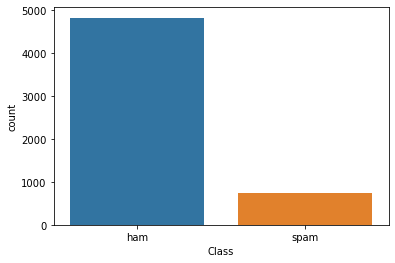

In [11]:
sns.countplot(x=df["Class"]);

In [12]:
#Things to do when starting a NLP project
#1-Convert everything to lowercase
#2-Remove punctuation marks
#3-Remove numbers
#4-Remove if enter is pressed at the end of lines
#5-Remove unnecessary words:stopwords
#6-Tokenize:We separated each word with commas
#7 Lemma and Stemma: remove attachments, split into roots
#8 Convert text to digits (convert to vector)

In [13]:
df['Text']= df['Text'].str.lower() #converted to lowercase
df['Text']= df['Text'].str.replace('[^\w\s]','') 
df['Text']= df['Text'].str.replace('\d+','') #removes digits
df['Text']= df['Text'].str.replace('\n','') #
df['Text']= df['Text'].str.replace('\r','') #enter remove

/var/folders/rn/b5vft9xd51l44scchc5xvckh0000gn/T/ipykernel_4847/2323774724.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']= df['Text'].str.replace('[^\w\s]','')
/var/folders/rn/b5vft9xd51l44scchc5xvckh0000gn/T/ipykernel_4847/2323774724.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']= df['Text'].str.replace('\d+','') #rakamları kaldırır


In [14]:
df.head()

,Class,Text,Label
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [15]:
from PIL import Image
import numpy as np
from wordcloud import STOPWORDS

In [16]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [17]:
print(STOPWORDS)

{'we', 'where', 'during', 'out', 'has', 'k', 'himself', 'further', 'hence', "don't", "let's", 'which', 'whom', "they're", 'are', 'is', 'the', 'why', 'your', "where's", 'if', 'should', 'she', 'of', 'again', 'have', "that's", 'with', "we'll", 'than', "what's", 'at', 'after', 'com', 'about', 'few', 'been', 'does', 'themselves', 'get', 'http', 'this', 'off', "she'd", 'as', 'below', 'and', 'on', "she's", 'do', 'same', 'their', 'who', 'did', 'yourself', 'each', 'them', 'hers', 'cannot', "hasn't", 'was', 'but', 'doing', 'nor', "shouldn't", 'too', 'myself', 'be', 'am', "he'll", 'what', "can't", 'i', 'other', "they've", 'under', 'to', "mustn't", 'yourselves', 'ought', 'an', 'otherwise', 'because', 'ours', 'some', 'while', 'then', "you'd", "haven't", 'a', 'up', 'him', 'for', "won't", "wasn't", 'itself', 'once', "we're", 'you', "he'd", 'not', 'until', 'how', 'all', 'herself', "wouldn't", 'my', 'had', "hadn't", "isn't", 'those', "how's", 'would', "they'll", 'so', 'since', 'in', "i've", 'or', 'thes

In [18]:
ham_text=df.query("Class=='ham'")['Text'] #Class sutununda ham olanların text ını al

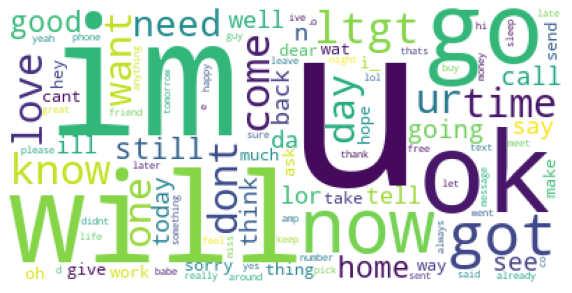

In [19]:
wc(ham_text,'white')

In [20]:
spam_text=df.query("Class=='spam'")['Text']

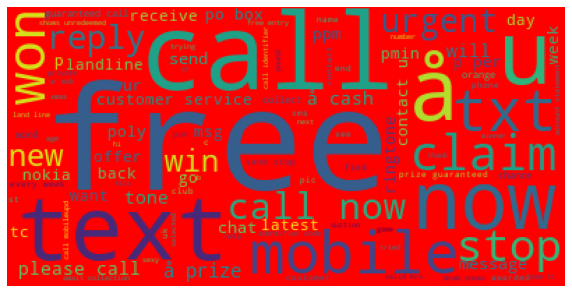

In [21]:
wc(spam_text,'red')

In [22]:
x=df["Text"]
y=df["Label"]

In [23]:
cv=CountVectorizer(stop_words='english')

In [24]:
x=cv.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=.20)

In [26]:
mnb=MultinomialNB()

In [27]:
tahmin=mnb.fit(x_train,y_train).predict(x_test)

In [28]:
confusion_matrix(tahmin,y_test)

array([[945,  13],
       [ 20, 137]])

In [29]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       958
           1       0.91      0.87      0.89       157

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



<AxesSubplot:>

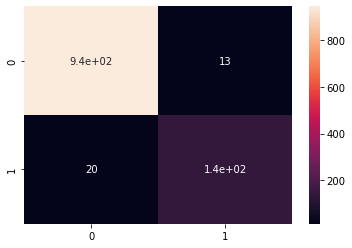

In [30]:
sns.heatmap(confusion_matrix(tahmin,y_test),annot=True) #annot uzerıne rakamaları da yazsın,heat map olarak confu gösterdık.

In [31]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [32]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [33]:
tahmin2=r.fit(x_train,y_train).predict(x_test)
tahmin3=d.fit(x_train,y_train).predict(x_test)

In [34]:
print(classification_report(tahmin2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       995
           1       0.79      0.98      0.87       120

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



In [35]:
print(classification_report(tahmin3,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       971
           1       0.85      0.88      0.86       144

    accuracy                           0.96      1115
   macro avg       0.91      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115

